# Singular value decomposition (SVD)

## ¿De qué nos sirve hacer SVD?

## Entrenando un poco la intuición

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

Let $m$ denote the vector of model parameters, and $d$ denote the data vector. $m \in \mathbb{R}^n, d \in \mathbb{R}^m$. Then the forward problem can be expressed using a linear system of equations.

Suppose $G m = d$. Let $G^\star$ denote the Moore-Penrose pseudoinverse of $G$, i.e. if the singular value decomposition of $G$ is $ G = U S V^T$, then the pseudoinverse is $G^\star = V S^{-1} U^T d$

We then define the pseudoinverse solution to be $m_\star = G^\star d$.

In [14]:
G1 = 10 * np.random.rand(3,3)
G2 = 10 * np.random.rand(3,2)
[U1, svalues1, V1] = linalg.svd(G1)
[U2, svalues2, V2] = linalg.svd(G2)

In order to compute the pseudoinverse, we need to know the rank of each matrix $G$.

In [15]:
rank1 = np.linalg.matrix_rank(G1)
rank2 = np.linalg.matrix_rank(G2)

Next, we show the shapes of the different outputs given by scipy.linalg.svd():

In [16]:
U1, U2

(array([[-0.66504318,  0.68957672,  0.28670807],
        [-0.66810885, -0.37782984, -0.64099546],
        [-0.33368869, -0.61784186,  0.71198546]]),
 array([[-0.78329328,  0.5123044 , -0.35213043],
        [-0.57850328, -0.80806186,  0.11122041],
        [-0.22756446,  0.29082681,  0.9293192 ]]))

In [17]:
svalues1, svalues2

(array([14.6367014 ,  7.27646391,  2.01286296]),
 array([10.41304369,  6.73082928]))

In [18]:
V1, V2

(array([[-0.74159123, -0.55866138, -0.37140263],
        [ 0.56154285, -0.81983985,  0.11194754],
        [-0.36703144, -0.12553918,  0.92169834]]),
 array([[-0.68318295, -0.73024726],
        [ 0.73024726, -0.68318295]]))

Do we get G1 when multiplying $U_1 S_1 V_1$?

In [19]:
U1 @ np.diag(svalues1) @ V1

array([[9.82450456, 1.25188808, 4.70888023],
       [6.18168061, 7.87903151, 2.13493089],
       [0.57147308, 6.2344024 , 2.631598  ]])

In [20]:
G1

array([[9.82450456, 1.25188808, 4.70888023],
       [6.18168061, 7.87903151, 2.13493089],
       [0.57147308, 6.2344024 , 2.631598  ]])

Do we compute the same generalized inverse as the one using np.pinv?

In [21]:
np.transpose(V1) @ linalg.inv(np.diag(svalues1)) @ np.transpose(U1)

array([[ 0.0346326 ,  0.12157373, -0.16059909],
       [-0.07019249,  0.10804876,  0.03794326],
       [ 0.15876918, -0.28237427,  0.32498296]])

In [22]:
linalg.pinv(G1)

array([[ 0.0346326 ,  0.12157373, -0.16059909],
       [-0.07019249,  0.10804876,  0.03794326],
       [ 0.15876918, -0.28237427,  0.32498296]])

In [23]:
np.transpose(V2) @ linalg.inv(np.diag(svalues2)) @ np.transpose(U2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

???
It is known that _every_ matrix has a pseudoinverse. Does scipy.linalg.pinv() work? 

In [24]:
linalg.pinv(G2)

array([[ 0.106972  , -0.04971432,  0.04648278],
       [ 0.00293171,  0.12258808, -0.01356041]])

What on earth is wrong here?

Well, $G_2$ has rank $2$. So, as we could see before, we got $2$ singular values. When making a diagonal matrix out of those singular values, we don't get the correct dimension. We could complete the $3 \times 3$ matrix, but that would be missing an opportunity. Rather, we shorten the $U_2$ and $V_2$ matrices, as follows:

In [25]:
U2, V2

(array([[-0.78329328,  0.5123044 , -0.35213043],
        [-0.57850328, -0.80806186,  0.11122041],
        [-0.22756446,  0.29082681,  0.9293192 ]]),
 array([[-0.68318295, -0.73024726],
        [ 0.73024726, -0.68318295]]))

We remind ourselves that $U_2$ is $3 \times 3$, but $V_2$ is $2 \times 2$. Hence, we need only modify $U_2$

In [26]:
U2[0:2,0:3]

array([[-0.78329328,  0.5123044 , -0.35213043],
       [-0.57850328, -0.80806186,  0.11122041]])

In [27]:
U2mod = U2[:,0:2]

In [28]:
np.transpose(V2) @ linalg.inv(np.diag(svalues2)) @ np.transpose(U2mod)

array([[ 0.106972  , -0.04971432,  0.04648278],
       [ 0.00293171,  0.12258808, -0.01356041]])

In [29]:
linalg.pinv(G2)

array([[ 0.106972  , -0.04971432,  0.04648278],
       [ 0.00293171,  0.12258808, -0.01356041]])

We then name $H_i$ the pseudoinverse of $G_i$ 

In [30]:
H1 = np.transpose(V1) @ linalg.inv(np.diag(svalues1)) @ np.transpose(U1)
H2 = np.transpose(V2) @ linalg.inv(np.diag(svalues2)) @ np.transpose(U2mod)

# Lo que queremos hacer

Después de seguir el simple procedimiento de Stein para tener la ecuación en terminos de $\frac{d}{dt}log(x_i)$, tenemos, para $n$ poblaciones, $n^2 + n$ parámetros. Es decir, para nosotros el vector $m \in \mathbb{R}^{n^2+n}$. Por otro lado, nuestro $d$ es... ¿una matriz?. 

Problema 1 (simple): Una serie de tiempo nos da data de la población $1 \leq i \leq n$ en tiempos $0 \leq t \leq t_{total}$. ¿Cómo hacer una regresión a partir de esa data? 

Posible solución: Nuestra matriz $G$, del modelo, nos debería de relacionar...

# An example in Neto (2013)

Picture the model $K x = y$

In [29]:
K = np.array([[1,0],[0,1/1024]])
y = np.array([1,2**-10])

In [47]:
x = linalg.inv(K) @ y
x

array([1., 1.])

In [52]:
# define perturbation p2 of x
p2 = np.array([2**-10,0])
y2 = y + p2
x2 = linalg.inv(K) @ y2
# define perturbation p3 of x
p3 = np.array([0,2**-10])
y3 = y + p3
x3 = linalg.inv(K) @ y3

In [53]:
x2, x3

(array([1.00097656, 1.        ]), array([1., 2.]))

In [54]:
# compute relative error
e2 = linalg.norm(x2-x)/linalg.norm(r2) 
e3 = linalg.norm(x3-x)/linalg.norm(r3)
[e2, e3]

[1.0, 1024.0]

Small perturbations in the data can lead to significant input errors. Regularizations are methods that intend to reduce this effect.

(array([0.99804688, 0.88737297, 0.47384885, 0.04892095, 0.45595231,
        0.7085817 , 0.84913027, 0.92323408, 0.96127904, 0.        ]),
 array([1022.        ,  908.66992188,  485.22122002,   50.0950529 ,
         466.89516886,  725.58766032,  869.50939975,  945.39170123,
         984.34973769,    0.        ]))

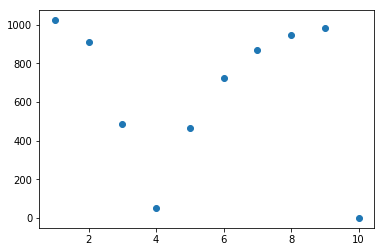

In [65]:
# total error vector
rvalues = np.zeros(10)
# relative error vector
evalues = np.zeros(10)
for i in range(9):
    a = 2**-(1+i)
    Ka = np.array([[1,0],[0,(1-a)**-10 * 2**-10]])
    xprime = linalg.inv(Ka) @ y3
    r = (linalg.norm(xprime-x))
    rvalues[i] = r
    evalues[i] = r/linalg.norm(p3)
plt.scatter(1+np.arange(10),evalues)
rvalues, evalues